In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [30]:
%load_ext line_profiler

In [2]:
from plot_utils import *

In [3]:
from importlib import reload
import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *


In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

# Load data

## threshold 1e-6 with complex64

In [73]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'0','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'0','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_0_S0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}_S0/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_0_S0=convert_pd(data_0_S0_dict,names=['Metrics','L','p_ctrl','p_proj'])


Loading data_dict Data/Metrics/0_S0/xj(0).pickle


generate_params: 100%|██████████| 11163/11163 [00:00<00:00, 17836.77it/s]


Loading data_dict Data/Metrics/0_S0/xj(0).pickle


generate_params: 100%|██████████| 7442/7442 [00:00<00:00, 15672.19it/s]


In [74]:
len(data_0_S0_dict['fn'])

480

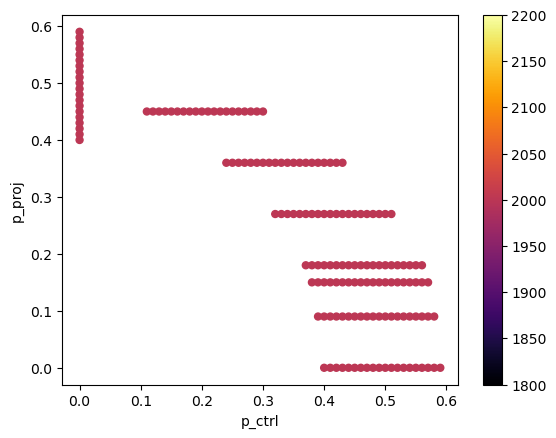

In [75]:
visualize_dataset(df_0_S0,params={'Metrics':'O','L':16},xlabel='p_ctrl',ylabel='p_proj')

## load all singular value

In [6]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([8,12,16])}),
({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(8),'L':np.array([20])}),
({'xj':'0','en':30,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(128),'L':np.array([24])})
]

data_0_S0_sv_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    # pass
    data_0_S0_sv_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_128{"_anc"*anc}_sv.pickle',
        # fn_dir_template='Data/Metrics/{xj}_sv/',
        fn_dir_template='{xj}_sv/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_S0_sv_dict,
        # data_dict_file='xj({xj})_128{"_anc"*anc}.pickle', 
    )


generate_params:  93%|█████████▎| 445091/476288 [25:05<03:19, 156.42it/s] 

: 

In [9]:
fns=set(os.listdir('0_sv'))

In [10]:
len(data_0_S0_sv_dict['fn'])

15151

In [11]:
[fn for fn in fns-data_0_S0_sv_dict['fn'] if '128' in fn]

['CT_En500_pctrl(0.42,0.42,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed4_128_sv.pickle']

In [15]:
df_0_S0_sv={}
# [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]
for threshold in tqdm([1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]):
    df_0_S0_sv[threshold]=convert_pd_0(data_0_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold)

  0%|          | 0/10 [00:00<?, ?it/s]/home/haining.pan/control_transition/plot_utils.py:276: RuntimeWarning: divide by zero encountered in log
  S0=np.log(np.count_nonzero((sv>threshold),axis=1))
 10%|█         | 1/10 [00:36<05:32, 36.93s/it]/home/haining.pan/control_transition/plot_utils.py:276: RuntimeWarning: divide by zero encountered in log
  S0=np.log(np.count_nonzero((sv>threshold),axis=1))
 20%|██        | 2/10 [01:10<04:37, 34.71s/it]/home/haining.pan/control_transition/plot_utils.py:276: RuntimeWarning: divide by zero encountered in log
  S0=np.log(np.count_nonzero((sv>threshold),axis=1))
 30%|███       | 3/10 [01:47<04:10, 35.75s/it]/home/haining.pan/control_transition/plot_utils.py:276: RuntimeWarning: divide by zero encountered in log
  S0=np.log(np.count_nonzero((sv>threshold),axis=1))
 40%|████      | 4/10 [02:20<03:28, 34.69s/it]/home/haining.pan/control_transition/plot_utils.py:276: RuntimeWarning: divide by zero encountered in log
  S0=np.log(np.count_nonzero((sv>thr

In [ ]:
df_0_S0_sv={threshold:convert_pd_0(data_0_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold) for threshold in [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]}

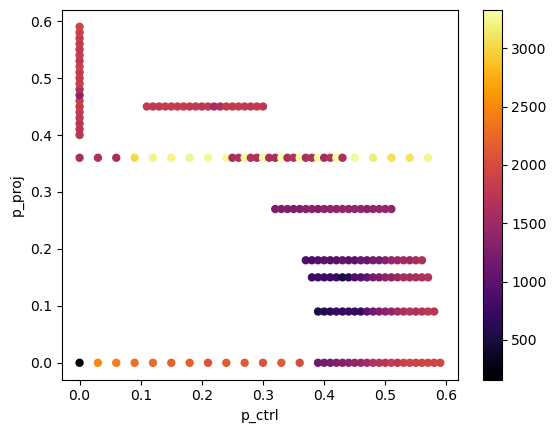

In [14]:
visualize_dataset(df_0_S0_sv[1e-15],params={'Metrics':'TMI','L':24},xlabel='p_ctrl',ylabel='p_proj')

In [16]:
with open('0_sv/df_0_S0_sv.pickle','wb') as f:
    pickle.dump(df_0_S0_sv,f)

In [6]:
with open('Data/Metrics/0_sv/df_0_S0_sv.pickle','rb') as f:
    df_0_S0_sv=pickle.load(f)

# Plot

## TMI mean

In [86]:
import matplotlib.pyplot as plt

(-1.25, 0.0)

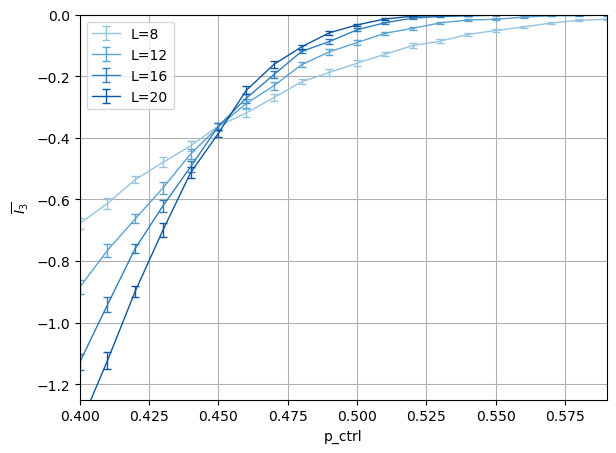

In [103]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.59])
plt.gca().set_ylim([-1.25,0])


(-1.25, 0.0)

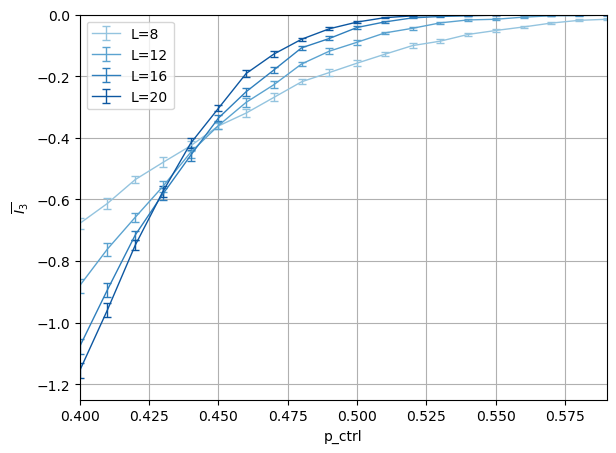

In [108]:
plot_line_inset(df=df_0_S0_sv[1e-7],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.59])
plt.gca().set_ylim([-1.25,0])


(-1.25, 0.0)

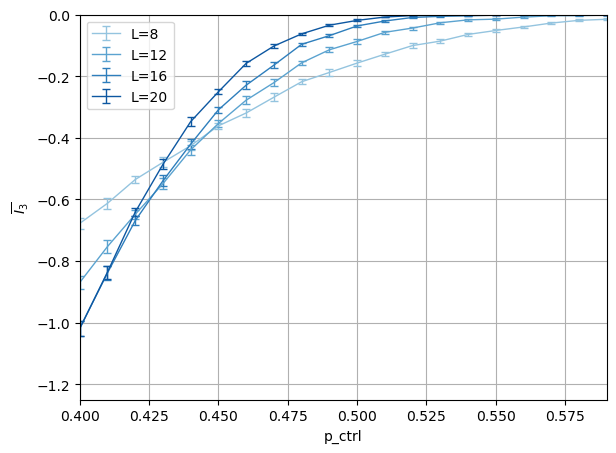

In [105]:
plot_line_inset(df=df_0_S0_sv[1e-6],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.59])
plt.gca().set_ylim([-1.25,0])


(0.39, 0.59)

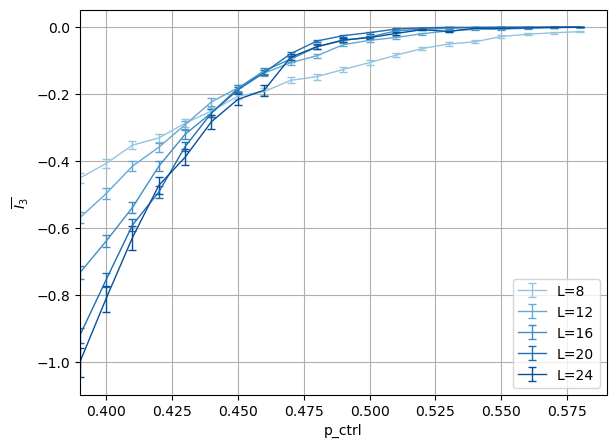

In [99]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.09},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.39,.59])

(0.37, 0.57)

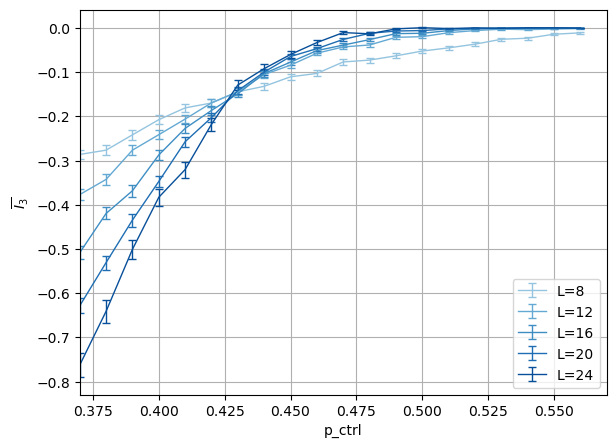

In [54]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.18},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.37,.57])

(0.32, 0.52)

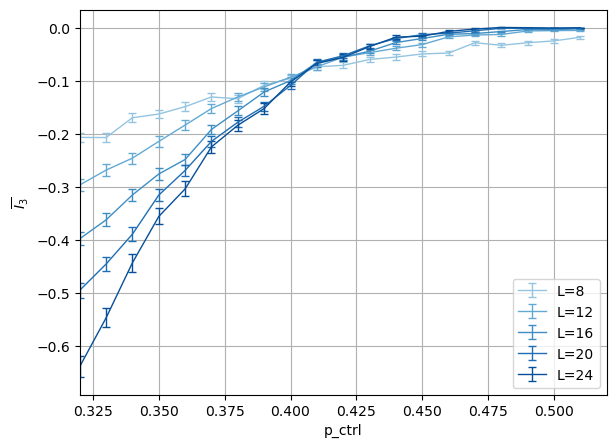

In [58]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.27},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.32,.52])

(0.24, 0.43)

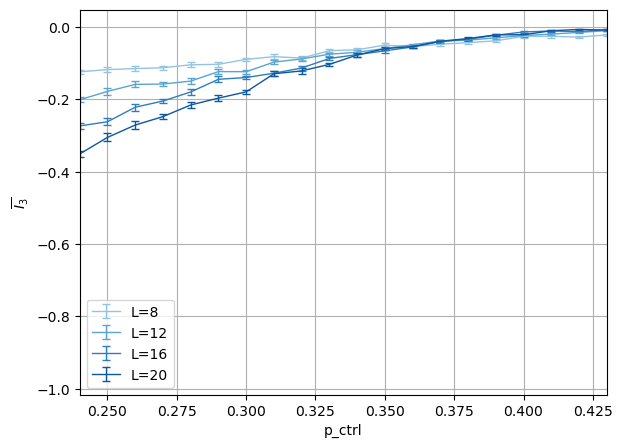

In [14]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.24,.43])

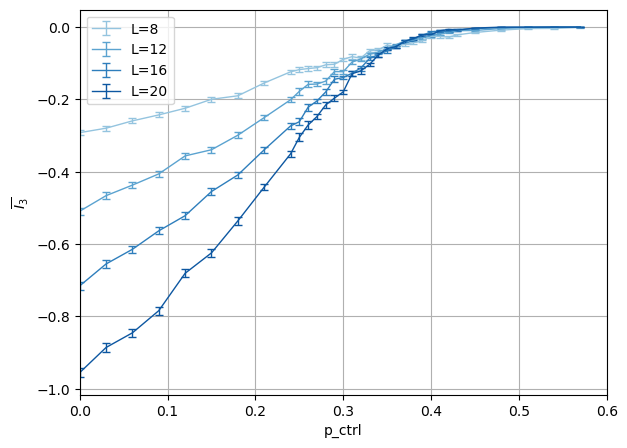

In [13]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([.24,.43])
# plt.gca().set_ylim([-0.4,0.])


In [ ]:
2 things to verify:
1. change another set of seed for L=24
2. increase ensemble sizes
3. it simply looks weird for p_proj=0.18

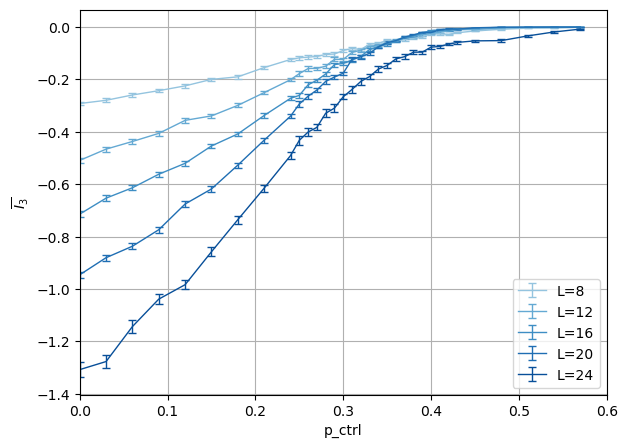

In [351]:
plot_line_inset(df=df_0_S0_sv_2[1e-12],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([.24,.55])
# plt.gca().set_ylim([-0.4,0.1])


(-0.4, 0.1)

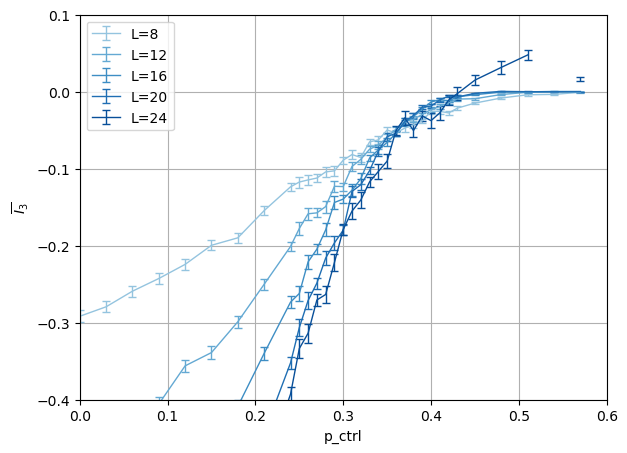

In [ ]:
plot_line_inset(df=df_0_S0_sv_2[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([.24,.55])
plt.gca().set_ylim([-0.4,0.1])


(0.37, 0.57)

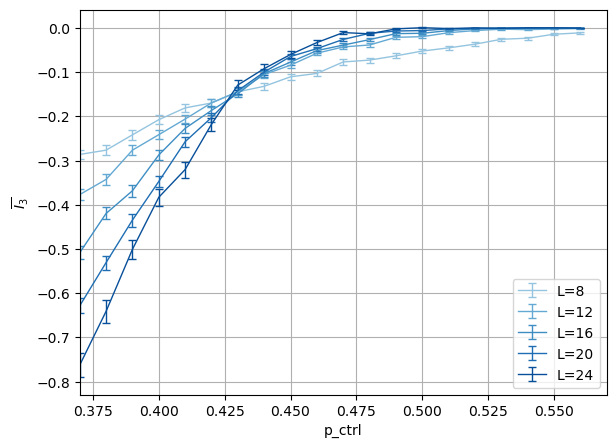

In [398]:
plot_line_inset(df=df_0_S0_sv_2[1e-14],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.18},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.37,0.57])

(0.37, 0.57)

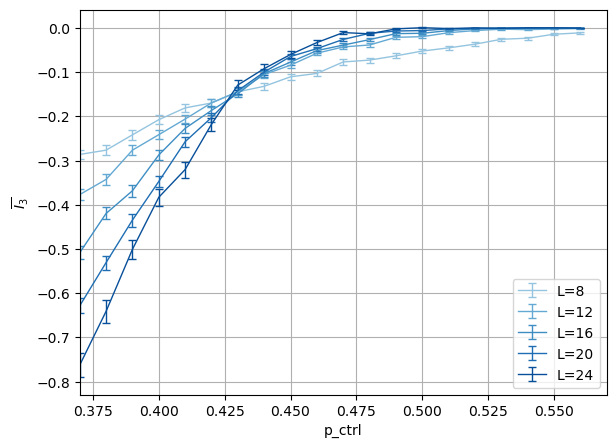

In [12]:
plot_line_inset(df=df_0_S0_sv[1e-14],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.18},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.37,0.57])

100%|██████████| 12/12 [00:00<00:00, 20.26it/s]


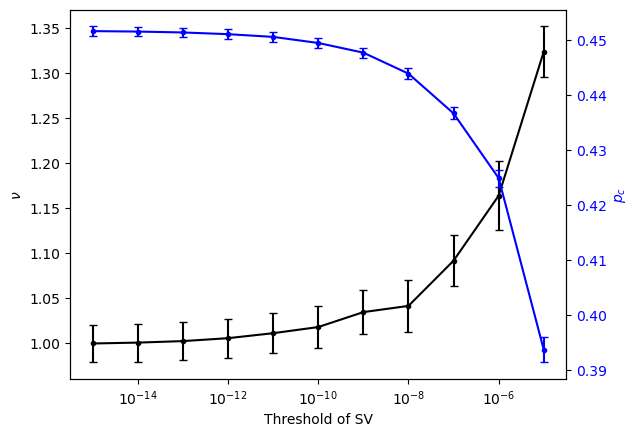

In [ ]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.451)

plot_extrapolate_fitting(dc)

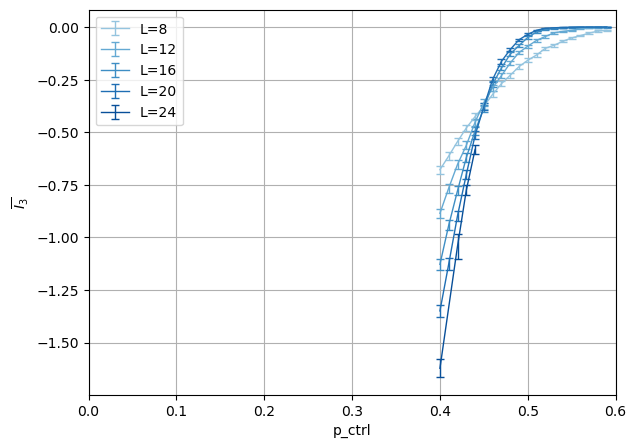

In [8]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)
# plt.gca().set_xlim([0.32,0.52])

In [9]:
dc=DataCollapse(df=df_0_S0_sv[1e-14],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.32,0.52],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.401,)

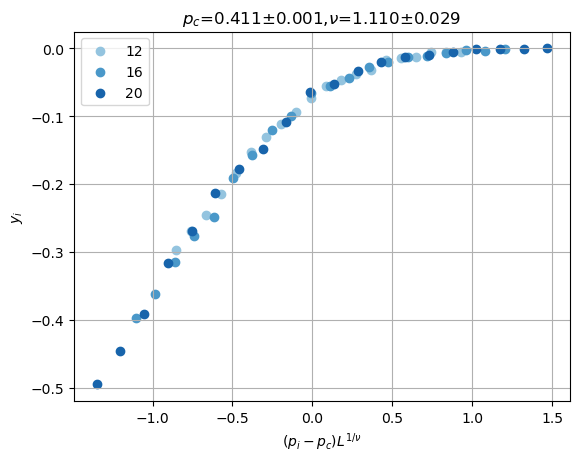

In [10]:
dc.plot_data_collapse()

(0.24, 0.44)

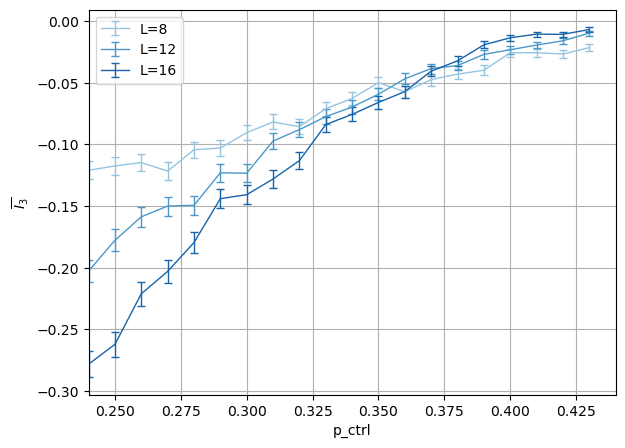

In [201]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.24,0.44])

(0.11, 0.31)

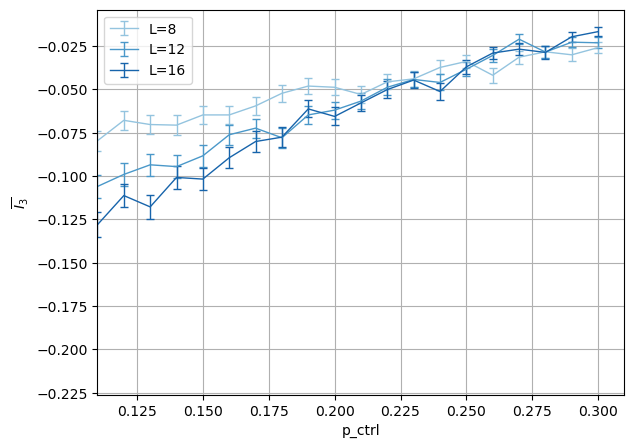

In [204]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.11,0.31])

(0.24, 0.44)

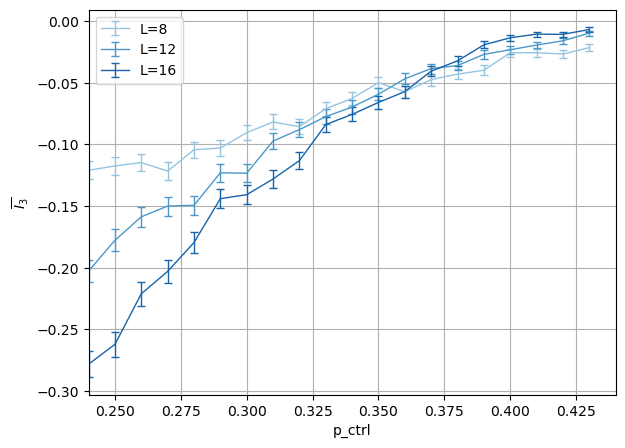

In [136]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.36},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.24,0.44])

(0.11, 0.31)

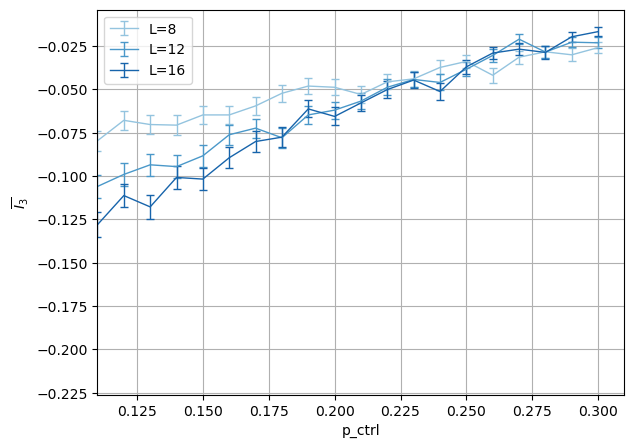

In [139]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.11,0.31])

(0.4, 0.6)

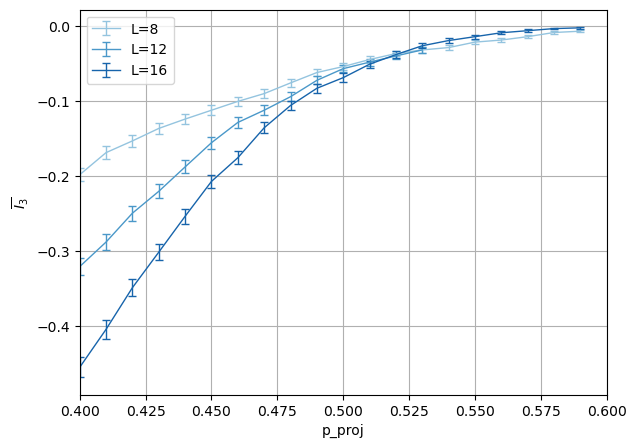

In [175]:
plot_line_inset(df=df_0_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])


## EE

(0.32, 0.51)

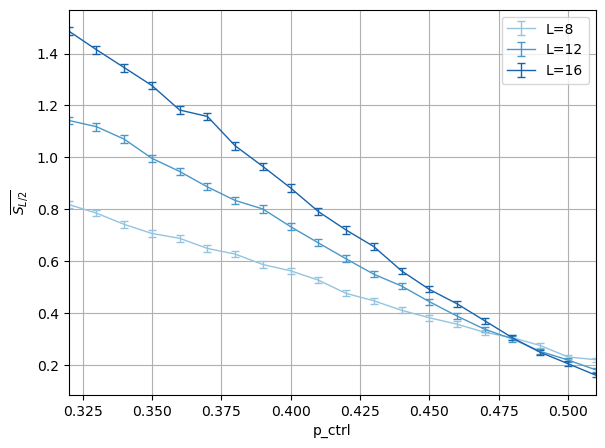

In [96]:
plot_line_inset(df=df_0_S0_sv[1e-6],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='EE',
x_name='p_ctrl',
fixed_params={'p_proj':.27},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.32,.51])


# Data collapse

### TMI mean (ent)

##### $p_{proj}$=0.00

In [55]:
dc_TMI_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl'])

##### $p_{proj}$=0.00

In [52]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=20,p_range=[0.37,0.52],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.0,p_c=0.461,)

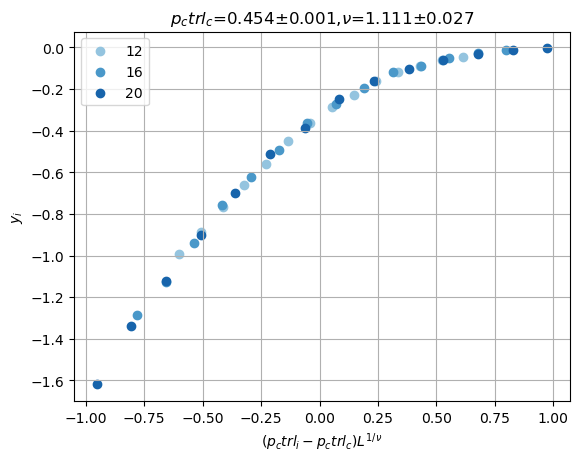

In [53]:
dc.plot_data_collapse()

In [56]:
dc_TMI_opt.add_optimal(dc)

In [58]:
dc=DataCollapse(df=df_0_S0_sv[1e-14],params={'Metrics':'TMI','p_proj':0.09},p_range=[0.39,0.51],Lmin=12,Lmax=20,p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.451,)

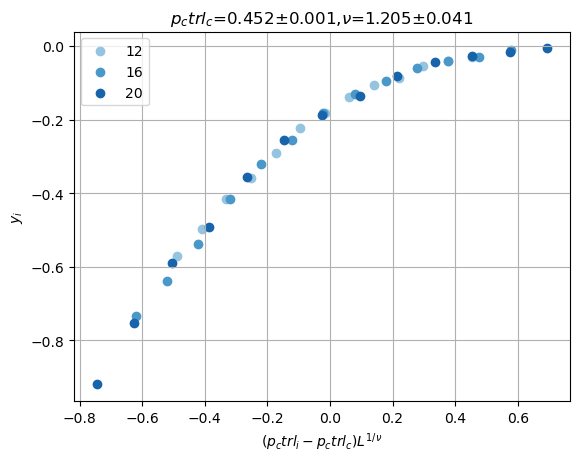

In [59]:
dc.plot_data_collapse()

In [61]:
dc_TMI_opt.add_optimal(dc)

In [68]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.18},p_range=[0.37,0.54],Lmin=12,Lmax=20,p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.441,)

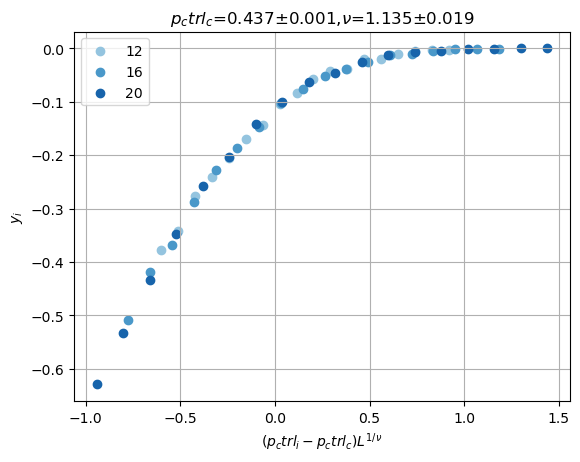

In [69]:
dc.plot_data_collapse()

In [70]:
dc_TMI_opt.add_optimal(dc)

In [73]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},p_range=[0.32,0.52],Lmin=12,Lmax=20,p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.411)

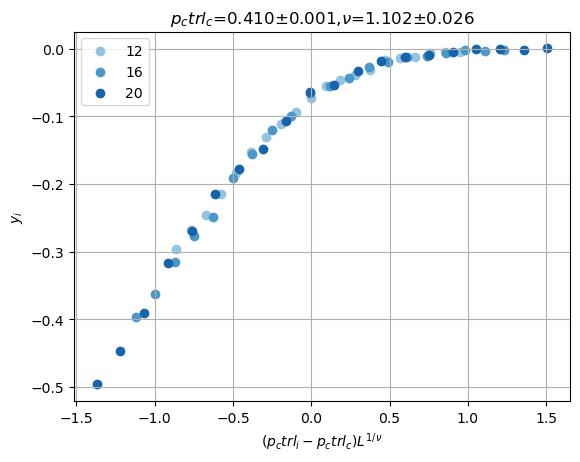

In [74]:
dc.plot_data_collapse()

In [75]:
dc_TMI_opt.add_optimal(dc)

In [81]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.36},p_range=[0.26,0.44],Lmin=12,Lmax=20,p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.351)

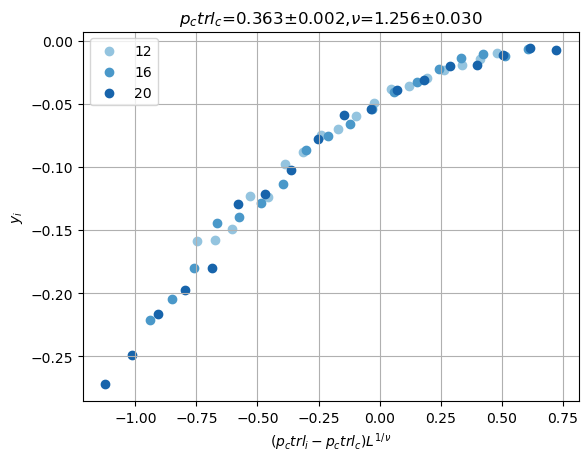

In [82]:
dc.plot_data_collapse()

In [83]:
dc_TMI_opt.add_optimal(dc)

In [87]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.45},p_range=[0.12,0.31],Lmin=12,Lmax=20,p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.3,p_c=0.215)

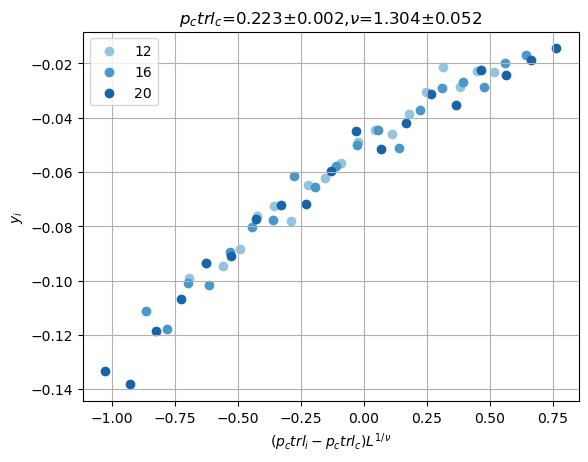

In [88]:
dc.plot_data_collapse()

In [89]:
dc_TMI_opt.add_optimal(dc)

In [92]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.},p_range=[0.4,0.6],Lmin=12,Lmax=20,p_='p_proj',L_='L')
dc.datacollapse(nu=1.3,p_c=0.501)

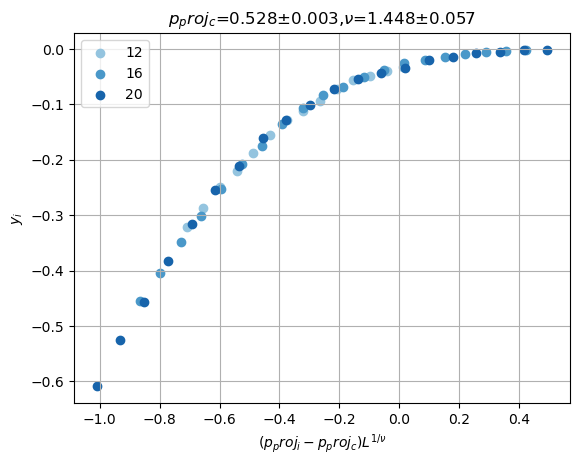

In [93]:
dc.plot_data_collapse()

In [94]:
dc_TMI_opt.add_optimal(dc)

In [95]:
with open('datacollapse_0_S0.pickle','wb') as f:
    pickle.dump(dc_TMI_opt.opt_df,f)

In [145]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.36},Lmin=12,Lmax=20,p_range=[0.24,0.44],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.351,)

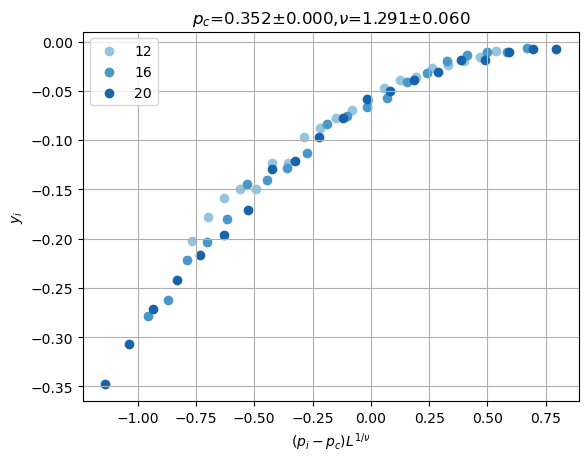

In [146]:
dc.plot_data_collapse()

## As a function of threshold

In [97]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=20,p_range=[0.37,0.52],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.0,p_c=0.461,)

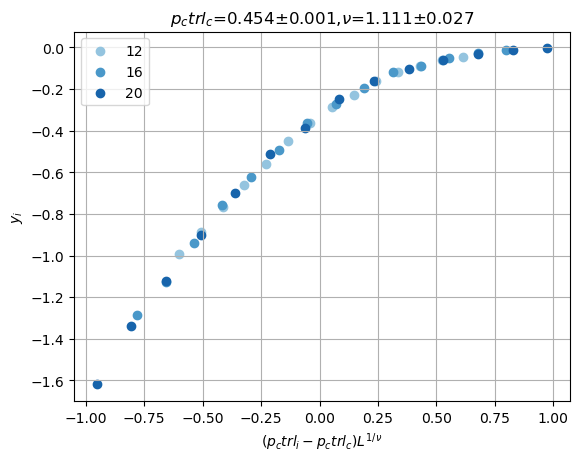

In [98]:
dc.plot_data_collapse()

# Extrapolation of fitting

In [99]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.54],Lmin=12,Lmax=24,p_='p_ctrl',L_='L')
# dc.datacollapse(nu=1.0,p_c=0.451,)
dc.datacollapse_with_drift_GLS(n1=2,n2=2,p_c=0.451,nu=1.05,y=2)


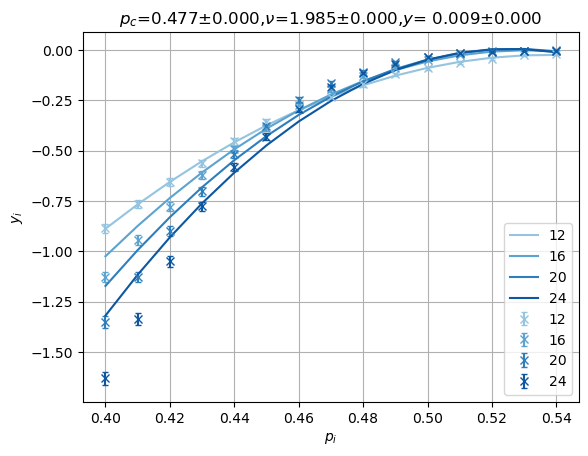

In [100]:
dc.plot_data_collapse(drift=True)  

100%|██████████| 15/15 [00:00<00:00, 35.84it/s]


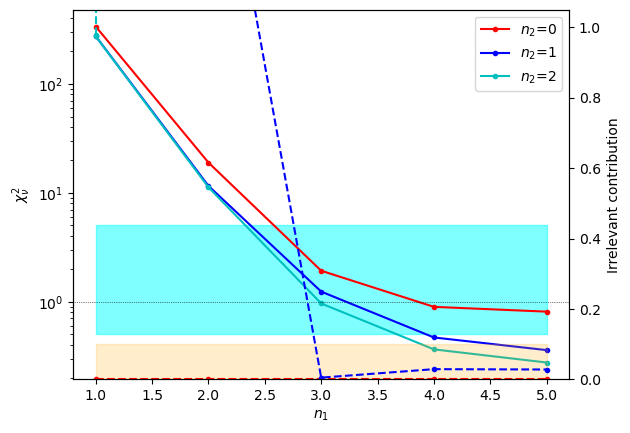

In [45]:
model=grid_search(n1_list=np.arange(1,6),n2_list=np.arange(3),p_c=0.481,nu=1.05,y=1,verbose=False,df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.0},Lmin=8,Lmax=20,p_range=[0.37,0.54],p_='p_ctrl',L_='L',p_c_range=(0,1),nu_range=(0.5,2))
plot_chi2_ratio(model)

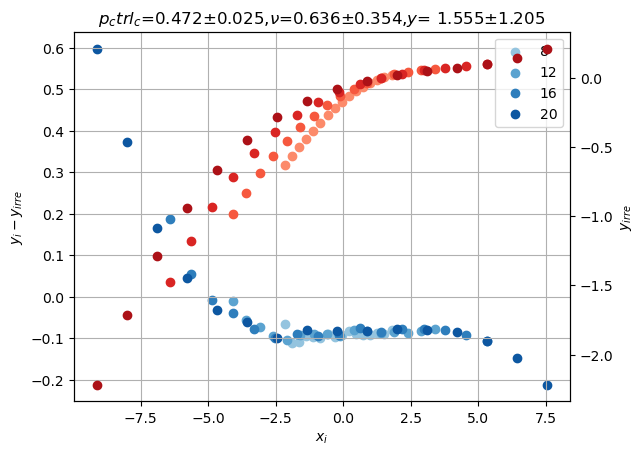

In [48]:
model[3,2].plot_data_collapse(drift=True,driftcollapse=True)  

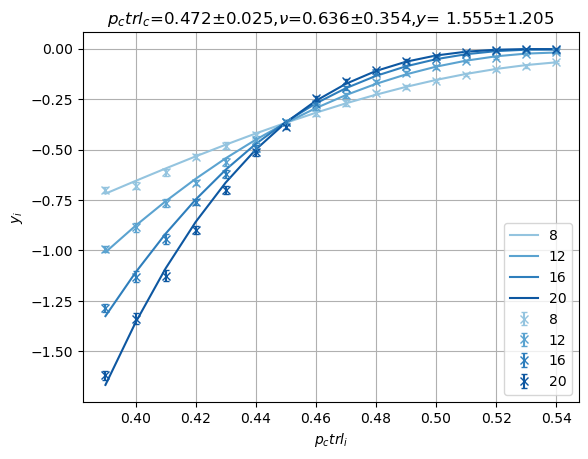

In [50]:
model[3,2].plot_data_collapse(drift=True)  

In [ ]:
model[3,1].res

100%|██████████| 12/12 [00:00<00:00, 93.98it/s]


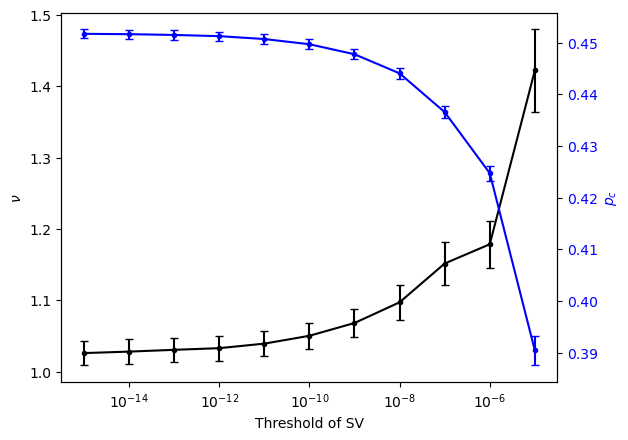

In [35]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=12,Lmax=20,threshold=(1e-16,1),nu=1.3,p_c=0.451,p_='p_ctrl',L_='L')

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 116.19it/s]


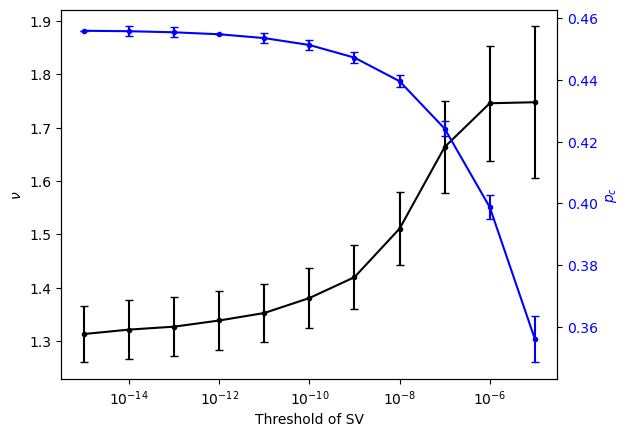

In [36]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.4,0.6],Lmin=16,Lmax=20,threshold=(1e-16,1),nu=1.3,p_c=0.451,p_='p_ctrl',L_='L')

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 23.88it/s]


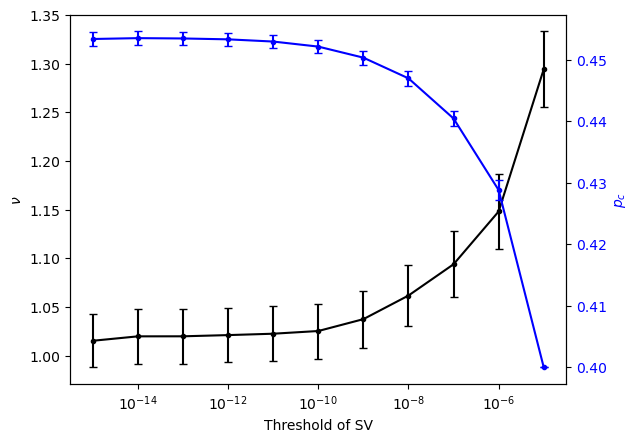

In [177]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.09},p_range=[0.39,0.59],Lmin=12,Lmax=24,threshold=(1e-16,1))

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 58.48it/s]


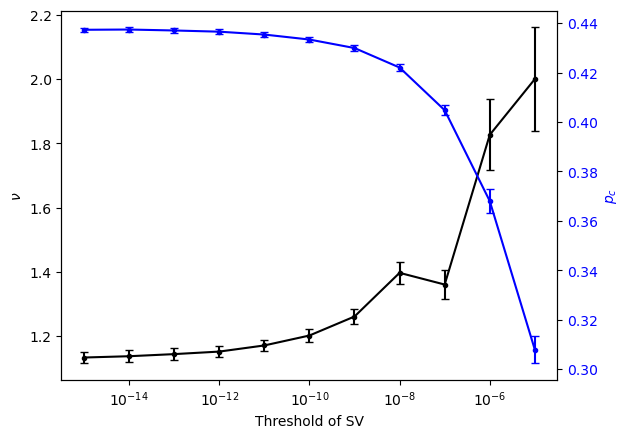

In [74]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.18},p_range=[0.37,0.57],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.421)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 58.22it/s]


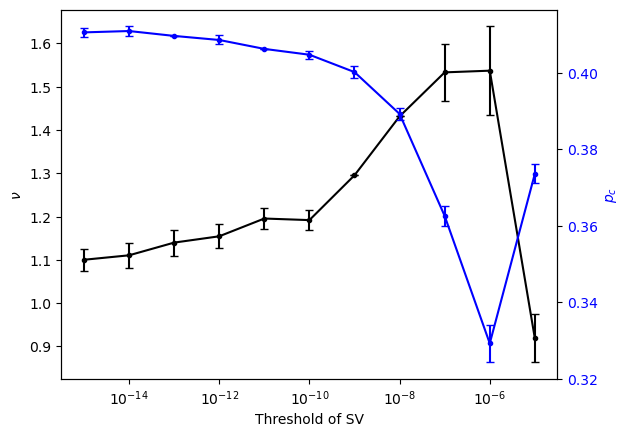

In [75]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.27},p_range=[0.32,0.52],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.401)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 66.52it/s]


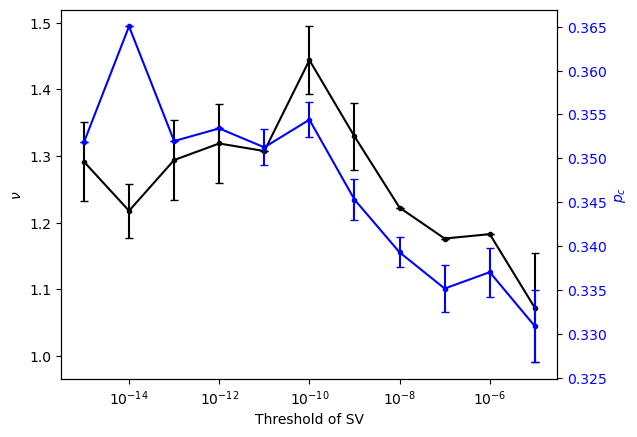

In [76]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.36},p_range=[0.24,0.44],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.351)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 61.11it/s]


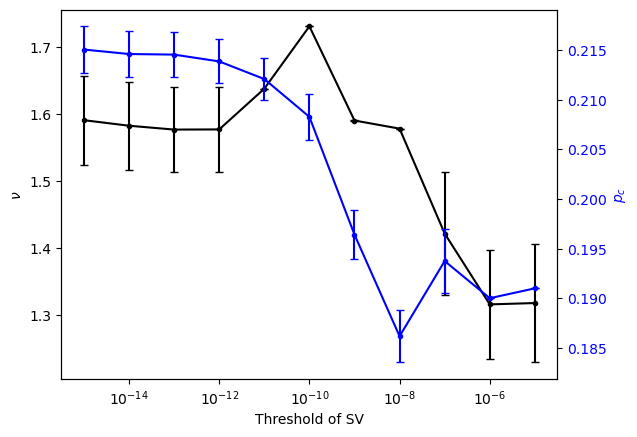

In [77]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_proj':0.45},p_range=[0.11,0.31],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.201)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 21.23it/s]


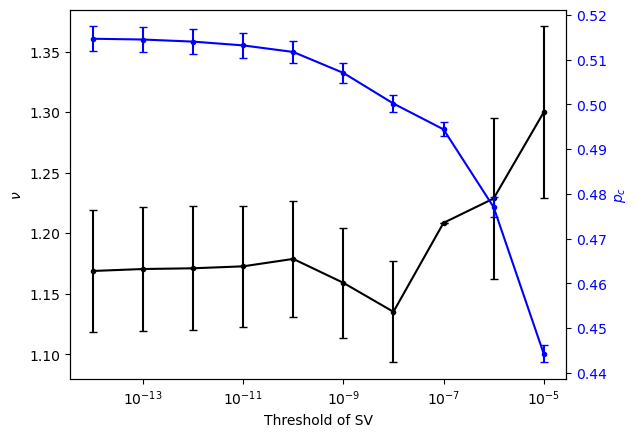

In [172]:
dc=extrapolate_fitting(data=df_0_S0_sv,params={'Metrics':'TMI','p_ctrl':0.},p_range=[0.4,0.6],Lmin=12,Lmax=24,threshold=(1e-15,1),nu=1.3,p_c=0.451)
plot_extrapolate_fitting(dc)

In [174]:
df_0_S0_sv[1e-15].xs(key=0,level='p_ctrl')

,,,observations
Metrics,L,p_proj,
O,8,0.40,"[0.10898701909030212, 0.011108692007958665, -0..."
TMI,8,0.40,"[0.0, 0.0, -0.6931471824645996, 0.0, 0.0, 0.0,..."
EE,8,0.40,"[0.6931471824645996, 0.6931471824645996, 1.386..."
O,16,0.40,"[-0.034130786917798764, -0.026762295286786558,..."
TMI,16,0.40,"[0.0, -1.3862943649291992, 0.0, -0.69314718246..."
...,...,...,...
EE,12,0.52,"[0.6931471824645996, 0.6931471824645996, 0.693..."
TMI,12,0.52,"[0.0, 0.0, 0.0, -0.6931471824645996, 0.0, 0.0,..."
O,12,0.53,"[0.016423049352043934, 0.1856791321890423, 0.1..."


In [17]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.451,)

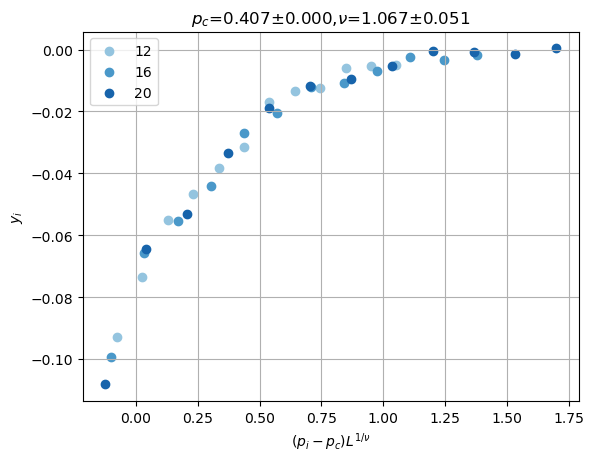

In [18]:
dc.plot_data_collapse()

In [11]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.451,)

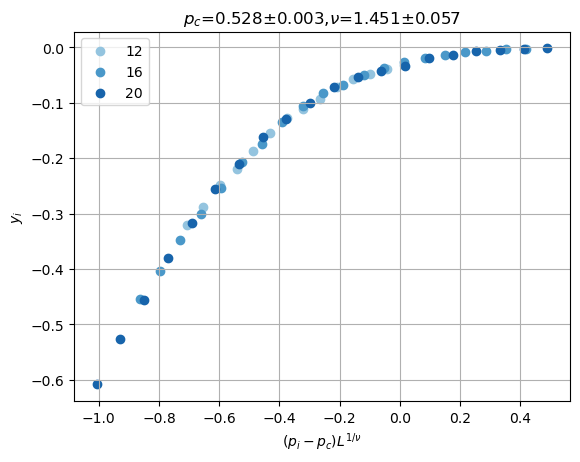

In [12]:
dc.plot_data_collapse()

In [13]:
dc=DataCollapse(df=df_0_S0_sv[1e-10],params={'Metrics':'TMI','p_ctrl':0},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.451,)

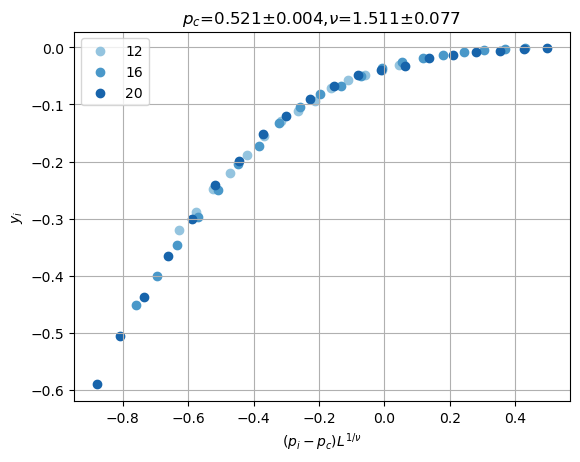

In [14]:
dc.plot_data_collapse()

# Bootstrapping

In [19]:
dc=DataCollapse(df=df_0_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=20,p_range=[0.4,0.6],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.05,p_c=0.451,)

In [24]:
resampling=[bootstrapping(df_0_S0_sv[1e-14],params={'Metrics':'TMI','p_proj':0},p_='p_ctrl',L_='L',p_range=[0.4,0.6],nu=1.05,p_c=0.451,rng=idx) for idx in range(100)]

In [25]:
p_c_list=[r.res.params['p_c'].value for r in resampling]
nu_list=[r.res.params['nu'].value for r in resampling]

In [26]:
np.mean(p_c_list),np.mean(nu_list)

(0.45256822371428357, 1.053129328060447)

In [27]:
np.std(p_c_list),np.std(nu_list)

(0.0010367271068500352, 0.02294329335881997)

In [ ]:
data_0_S0_sv_dict_test

In [ ]:
data_0_S0_sv_2_dict[('TMI_S_A', 24, 0.54, 0.36)]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.13765374e-16, 2.05861468e-16, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
np.seterr(all='warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
params=( 24, 0.42, 0.36)
z_drop=tripartite_mutual_information(
    S_A=data_0_S0_sv_2_dict[('TMI_S_A',)+params],
    S_B=data_0_S0_sv_2_dict[('TMI_S_B',)+params],
    S_C=data_0_S0_sv_2_dict[('TMI_S_C',)+params],
    S_AB=data_0_S0_sv_2_dict[('TMI_S_AB',)+params],
    S_AC=data_0_S0_sv_2_dict[('TMI_S_AC',)+params],
    S_BC=data_0_S0_sv_2_dict[('TMI_S_BC',)+params],
    S_ABC=data_0_S0_sv_2_dict[('TMI_S_ABC',)+params],
    threshold=1e-10,n=0,postprocess='drop'
)
z_enf=tripartite_mutual_information(
    S_A=data_0_S0_sv_2_dict[('TMI_S_A',)+params],
    S_B=data_0_S0_sv_2_dict[('TMI_S_B',)+params],
    S_C=data_0_S0_sv_2_dict[('TMI_S_C',)+params],
    S_AB=data_0_S0_sv_2_dict[('TMI_S_AB',)+params],
    S_AC=data_0_S0_sv_2_dict[('TMI_S_AC',)+params],
    S_BC=data_0_S0_sv_2_dict[('TMI_S_BC',)+params],
    S_ABC=data_0_S0_sv_2_dict[('TMI_S_ABC',)+params],
    threshold=1e-10,n=0,postprocess='enforce'
)

/mnt/d/Rutgers/control_transition/plot_utils.py:249: RuntimeWarning: underflow encountered in square
  
/mnt/d/Rutgers/control_transition/plot_utils.py:252: RuntimeWarning: underflow encountered in square
  vary_params,


In [ ]:
np.isnan(z_drop).sum()

528

In [ ]:
np.isnan(z_enf).sum()

0

In [ ]:
z_drop[5]

nan

In [ ]:
z_enf[5]

0.0

In [ ]:
mask=(z_enf!=z_drop)

In [ ]:
z_enf[mask]

In [ ]:
mask.sum()

528

In [ ]:
np.nanmean(z_drop)

-0.002381996836151053

In [ ]:
z_enf.mean()

-0.06352103145465808

In [ ]:
np.where(z>0)[0]

In [ ]:
z[idx]

0.6931471805599453

In [ ]:
np.mean(z)

-inf

In [ ]:
z[782]

-inf

# Numerical error

In [1]:
import pickle

In [2]:
with open('Data/Metrics/CT_En30_pctrl(0.42,0.42,1)_pproj(0.36,0.36,1)_L(24,26,2)_xj(0)_seed0_128_sv.pickle','rb') as f:
    z=pickle.load(f)

In [8]:
with open('Data/Metrics/0_sv/CT_En30_pctrl(0.42,0.42,1)_pproj(0.36,0.36,1)_L(24,26,2)_xj(0)_seed0_128_sv.pickle','rb') as f:
    z=pickle.load(f)

In [3]:
z['TMI']['S_B'][0,0,0,5]

tensor([ 1.0000e+00,  1.6112e-03,  2.5830e-16,  1.2622e-16,  8.2345e-17,
         5.0981e-17,  3.2745e-17,  2.9421e-17,  1.3251e-18,  2.1469e-21,
         8.1737e-33,  5.1355e-33,  4.1035e-33,  2.6519e-33,  1.9850e-33,
         1.4851e-33,  7.7729e-34,  3.5485e-38,  3.8546e-49,  2.8977e-49,
         1.7642e-49,  1.1181e-49,  6.6861e-50,  3.1826e-50,  2.3103e-50,
         1.0043e-54,  2.6515e-65,  1.7743e-65,  1.2864e-65,  3.6008e-66,
         1.2464e-66,  6.1537e-71,  2.4320e-81,  1.0110e-81,  7.1566e-82,
         3.3269e-87,  1.5553e-97,  7.4063e-98,  5.6883e-98, 3.6841e-103,
        1.4013e-113, 5.5187e-114, 4.8132e-114, 4.3823e-119, 6.4259e-130,
        3.1156e-130, 2.4262e-130, 9.3966e-136, 4.2883e-146, 2.5498e-146,
        1.2230e-146, 5.7893e-152, 2.4053e-162, 1.8596e-162, 5.9351e-163,
        8.1167e-168, 1.7216e-178, 2.8600e-184, 8.7942e-195, 9.9326e-201,
        8.3904e-211, 2.8986e-217, 2.4493e-227,  0.0000e+00],
       dtype=torch.float64)

In [25]:
z['EE']

tensor([[[[[9.9490e-01, 1.0086e-01, 4.7381e-16,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.0000e+00, 1.3115e-04, 4.0623e-16,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.0000e+00, 6.3932e-16, 4.2228e-16,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [9.9995e-01, 1.0061e-02, 3.9157e-16,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.8850e-01, 1.5001e-01, 1.7613e-02,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.0000e+00, 1.1957e-03, 5.2944e-16,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]]]]], dtype=torch.float64)

In [ ]:
z['EE']

tensor([[[[[3.6825e+00, 9.7444e-01, 3.0284e-15,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.0835e+00, 1.2648e-03, 3.8646e-15,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [8.4394e+00, 3.8415e-15, 3.5887e-15,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [1.0649e+01, 1.0969e-01, 4.4406e-15,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [7.9642e+00, 2.0826e+00, 5.0925e-01,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [1.1014e+01, 1.3409e-02, 6.8749e-15,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]]]]], dtype=torch.float64)

In [21]:
z['TMI']['S_B']

tensor([[[[[nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           ...,
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan],
           [nan, nan, nan,  ..., nan, nan, nan]]]]], dtype=torch.float64)

In [7]:
[(z['TMI'][key][0,0,0,9]**2).sum()-1 for key in ['S_A','S_B','S_C','S_AB','S_AC','S_BC','S_ABC']]

[tensor(1.3323e-15, dtype=torch.float64),
 tensor(1.3323e-15, dtype=torch.float64),
 tensor(0.0002, dtype=torch.float64),
 tensor(1.7764e-15, dtype=torch.float64),
 tensor(1.3323e-15, dtype=torch.float64),
 tensor(1.7764e-15, dtype=torch.float64),
 tensor(8.8818e-16, dtype=torch.float64)]

In [4]:
[(z['TMI'][key][0,0,0,5]**2).sum()-1 for key in ['S_A','S_B','S_C','S_AB','S_AC','S_BC','S_ABC']]

[tensor(3.9968e-15, dtype=torch.float64),
 tensor(2.9399e-05, dtype=torch.float64),
 tensor(4.2188e-15, dtype=torch.float64),
 tensor(3.9968e-15, dtype=torch.float64),
 tensor(4.6629e-15, dtype=torch.float64),
 tensor(4.8850e-15, dtype=torch.float64),
 tensor(4.6629e-15, dtype=torch.float64)]

In [10]:
[(z['TMI'][key][0,0,0,9]**2).sum()-1 for key in ['S_A','S_B','S_C','S_AB','S_AC','S_BC','S_ABC']]

[tensor(1.3323e-15, dtype=torch.float64),
 tensor(1.3323e-15, dtype=torch.float64),
 tensor(0.0002, dtype=torch.float64),
 tensor(1.7764e-15, dtype=torch.float64),
 tensor(1.3323e-15, dtype=torch.float64),
 tensor(1.7764e-15, dtype=torch.float64),
 tensor(8.8818e-16, dtype=torch.float64)]

In [ ]:
np.where(sum([(np.abs(np.sum(data_0_S0_sv_2_dict[(key, 24, 0.42, 0.36)]**2,axis=1)-1)>5.5e-15) for key in ['TMI_S_A','TMI_S_B','TMI_S_C','TMI_S_AB','TMI_S_AC','TMI_S_BC','TMI_S_ABC']]))[0]

/tmp/ipykernel_1019631/3938647878.py:1: RuntimeWarning: underflow encountered in square
  np.where(sum([(np.abs(np.sum(data_0_S0_sv_2_dict[(key, 24, 0.42, 0.36)]**2,axis=1)-1)>5.5e-15) for key in ['TMI_S_A','TMI_S_B','TMI_S_C','TMI_S_AB','TMI_S_AC','TMI_S_BC','TMI_S_ABC']]))[0]


array([   5,    9,   18,   25,   35,   37,   46,   47,   68,   73,   76,
         86,   91,   93,  124,  125,  129,  130,  133,  138,  144,  149,
        170,  178,  185,  192,  195,  198,  202,  217,  219,  222,  223,
        242,  249,  255,  268,  289,  291,  304,  306,  307,  321,  323,
        350,  351,  362,  365,  373,  374,  375,  376,  378,  380,  387,
        390,  407,  414,  417,  425,  440,  443,  446,  448,  459,  468,
        470,  478,  481,  482,  488,  492,  494,  510,  519,  530,  532,
        558,  565,  569,  577,  583,  587,  600,  610,  618,  626,  627,
        632,  637,  650,  653,  655,  656,  659,  668,  672,  676,  685,
        687,  692,  693,  698,  715,  719,  723,  730,  738,  747,  754,
        763,  771,  781,  782,  801,  814,  815,  820,  821,  833,  850,
        854,  869,  871,  875,  886,  887,  897,  923,  926,  933,  937,
        940,  946,  950,  957,  958,  960,  968,  977,  980,  987,  998,
       1002, 1012, 1015, 1022, 1025, 1035, 1047, 10

In [ ]:
idx=9

In [ ]:
norm=lambda x: np.sum(x**2)

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_A', 24, 0.42, 0.36)][idx])-1

/tmp/ipykernel_1019631/3229568114.py:1: RuntimeWarning: underflow encountered in square
  norm=lambda x: np.sum(x**2)


-6.661338147750939e-16

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_B', 24, 0.42, 0.36)][idx])-1


-4.440892098500626e-16

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_C', 24, 0.42, 0.36)][idx])-1


/tmp/ipykernel_1019631/3229568114.py:1: RuntimeWarning: underflow encountered in square
  norm=lambda x: np.sum(x**2)


-6.661338147750939e-16

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_AB', 24, 0.42, 0.36)][idx])-1

/tmp/ipykernel_1019631/3229568114.py:1: RuntimeWarning: underflow encountered in square
  norm=lambda x: np.sum(x**2)


-6.661338147750939e-16

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_AC', 24, 0.42, 0.36)][idx])-1


0.0

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_BC', 24, 0.42, 0.36)][idx])-1


-6.661338147750939e-16

In [ ]:
norm(data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.42, 0.36)][idx])-1

-1.1102230246251565e-15

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_A', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.0

In [ ]:
(entropy(data_0_S0_sv_2_dict[('TMI_S_B', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx])

0.6931471805599453

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_C', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.6931471805599453

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_AB', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.6931471805599453

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_AC', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.6931471805599453

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_BC', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.0

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.42, 0.36)],threshold=1e-10,n=0)[idx]

0.6931471805599453

In [ ]:
entropy(data_0_S0_sv_2_dict[('TMI_S_A', 24, 0.51, 0.36)],threshold=1e-10,n=0)+entropy(data_0_S0_sv_2_dict[('TMI_S_B', 24, 0.51, 0.36)],threshold=1e-10,n=0)+entropy(data_0_S0_sv_2_dict[('TMI_S_C', 24, 0.51, 0.36)],threshold=1e-10,n=0)-entropy(data_0_S0_sv_2_dict[('TMI_S_AB', 24, 0.51, 0.36)],threshold=1e-10,n=0)-entropy(data_0_S0_sv_2_dict[('TMI_S_AC', 24, 0.51, 0.36)],threshold=1e-10,n=0)-entropy(data_0_S0_sv_2_dict[('TMI_S_BC', 24, 0.51, 0.36)],threshold=1e-10,n=0)+entropy(data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.51, 0.36)],threshold=1e-10,n=0)

array([ 0.00000000e+00,  0.00000000e+00, -1.11022302e-16, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
((data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.54, 0.36)]**2).sum(axis=1)).argmin()

/tmp/ipykernel_1019631/1289226184.py:1: RuntimeWarning: underflow encountered in square
  ((data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.54, 0.36)]**2).sum(axis=1)).argmin()


782

In [ ]:
data_0_S0_sv_2_dict[('TMI_S_ABC', 24, 0.54, 0.36)][782]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.18,0.18,61),'s':np.arange(0,2),'L':np.array([8,12,16])}),
({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.18,0.18,61),'s':np.arange(0,8),'L':np.array([20])}),
({'xj':'0','en':30,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0.18,0.18,61),'s':np.arange(0,128),'L':np.array([24])})
]

data_0_S0_sv_2_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    # pass
    data_0_S0_sv_2_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_128{"_anc"*anc}_sv.pickle',
        fn_dir_template='Data/Metrics/{xj}_sv/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_S0_sv_2_dict,
        # data_dict_file='xj({xj})_128{"_anc"*anc}.pickle', 
    )


generate_params: 100%|██████████| 476288/476288 [02:10<00:00, 3653.68it/s] 


In [ ]:
df_0_S0_sv_2={}
# [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]
for threshold in ([1e-12,1e-13,1e-14,1e-15,]):
    df_0_S0_sv_2[threshold]=convert_pd_0(data_0_S0_sv_2_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold)

  0%|          | 0/901 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:249: RuntimeWarning: underflow encountered in square
  
  0%|          | 0/901 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:249: RuntimeWarning: underflow encountered in square
  
  0%|          | 0/901 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:249: RuntimeWarning: underflow encountered in square
  
  0%|          | 0/901 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:249: RuntimeWarning: underflow encountered in square
  
100%|██████████| 901/901 [00:03<00:00, 294.21it/s] 


In [ ]:
df_0_S0_sv_2[1e-5].xs(key=['TMI',0.54,0.36,24],level=['Metrics','p_ctrl','p_proj','L'])['observations']

/tmp/ipykernel_1019631/1832209745.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df_0_S0_sv_2[1e-5].xs(key=['TMI',0.54,0.36,24],level=['Metrics','p_ctrl','p_proj','L'])['observations']


Metrics  L   p_ctrl  p_proj
TMI      24  0.54    0.36      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: observations, dtype: object

In [ ]:
df_0_S0_sv_2[1e-5].xs(key=['TMI',0.54,0.36,24],level=['Metrics','p_ctrl','p_proj','L'])['observations'].apply(np.mean)

/tmp/ipykernel_1019631/3304360807.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df_0_S0_sv_2[1e-5].xs(key=['TMI',0.54,0.36,24],level=['Metrics','p_ctrl','p_proj','L'])['observations'].apply(np.mean)


Metrics  L   p_ctrl  p_proj
TMI      24  0.54    0.36     -inf
Name: observations, dtype: float64